In [161]:
# imports
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor

import pickle

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [392]:
# loading data
test_set_path = 'data/test.csv'
train_set_path = 'data/train.csv'

test_set = pd.read_csv(test_set_path)
train_set = pd.read_csv(train_set_path)

In [393]:
test_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [394]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [395]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [396]:
train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [397]:
# function to get the categorical and numeric columns
def get_cat_num_cols(dataset):
  # get numeric and categorical columns
  numeric_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']
  categorical_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
  return numeric_cols, categorical_cols

def get_missing_percentage(col_names, full_dataset, threshold=0):
    dataset = full_dataset[col_names]
    missing_percentage = {}
    for col in dataset.columns:
        val = round((dataset[col].isnull().sum()/dataset.shape[0])*100,2)
        if val > threshold:
            missing_percentage[col] = val
    return missing_percentage
    
# function to get columns missing value percentage
def get_missing_columns_percentage(dataset, type='full', threshold=0):
    num, cat = get_cat_num_cols(dataset)
    num_missing_percentage = get_missing_percentage(num, dataset, threshold)
    cat_missing_percentage = get_missing_percentage(cat, dataset, threshold)
    missing= []
    if type=='num':
        missing.append(num_missing_percentage)
        return missing
    elif type=='cat':
        missing.append(cat_missing_percentage)
        return missing
    else:
        return num_missing_percentage, cat_missing_percentage
  
# function to extract feature and label
def extractor(dataset, label):
  # drop rows with missing targets
  dataset.dropna(axis=0, subset=['SalePrice'], inplace=True)
  X = dataset.drop(label, axis=1)
  y = dataset[label]
  return X, y

# function to get collinearity
def get_multicollinearity(dataset, target_column=None, column1=None, column2=None):
    if column1 and column2:
        corr_mat = dataset[column1, column2].corr()
    elif target_column:
        corr_mat = None
        columns = dataset.columns
        for column in columns:
            if column.dtype != 'object':
                corr_mat = dataset[column, target_column].corr()
    else:
        corr_mat = dataset.corr(numeric_only=True)
    return corr_mat
    

# function to drop null-like columns
def drop_columns(dataset, columns):
    new_dataset = dataset.drop(columns=columns)
    return new_dataset

def drop_rows(dataset, threshold=5):
    subset_dic = get_missing_columns_percentage(dataset, threshold=threshold)
    subset_list = []
    for i in subset_dic:
        subset_list = list(i.keys())
    new_dataset = dataset.dropna(axis=0, subset=subset_list)
    return new_dataset

In [398]:
# Missing value handling
### Drop -> cos of irrelivancies
values_to_drop = ['Id']
### Drop -> cos the have too many null values
values_to_drop += ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'MasVnrType']

In [399]:
train_set_cleaned = drop_columns(train_set, values_to_drop)

In [400]:
# further columns to drop due to leakeages -> wont be availble for prediction
values_to_drop = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition']

In [401]:
train_set_cleaned = drop_columns(train_set_cleaned, values_to_drop)

In [402]:
train_set_cleaned.shape

(1460, 70)

In [403]:
get_multicollinearity(train_set_cleaned)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378


In [404]:
# further columns to drop based on poor colinearity with the target
values_to_drop = ['MSSubClass', 'BsmtFinSF2', '3SsnPorch', 'PoolArea', 'MiscVal', 'EnclosedPorch', 'ScreenPorch', 'OverallCond', 'KitchenAbvGr', 'BedroomAbvGr']

In [405]:
train_set_cleaned = drop_columns(train_set_cleaned, values_to_drop)

In [406]:
train_set_cleaned.shape

(1460, 60)

In [407]:
# Drop rows
train_set_cleaned = drop_rows(train_set_cleaned)

In [408]:
train_set_cleaned.shape

(1379, 60)

In [409]:
total_column_to_drop = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'MasVnrType','MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'MSSubClass', 'BsmtFinSF2', '3SsnPorch', 'PoolArea', 'MiscVal', 'EnclosedPorch', 'ScreenPorch', 'OverallCond', 'KitchenAbvGr', 'BedroomAbvGr']

In [410]:
test_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [411]:
test_set_cleaned = drop_columns(test_set, total_column_to_drop)

In [412]:
test_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [413]:
test_set_cleaned.shape

(1459, 59)

In [414]:
# get missing values
get_missing_columns_percentage(train_set_cleaned, type='full')

({'LotFrontage': 18.27, 'MasVnrArea': 0.58},
 {'BsmtQual': 2.18,
  'BsmtCond': 2.18,
  'BsmtExposure': 2.25,
  'BsmtFinType1': 2.18,
  'BsmtFinType2': 2.25,
  'Electrical': 0.07})

In [415]:
missing_numerical = get_missing_columns_percentage(train_set_cleaned, type='num')
missing_numerical

[{'LotFrontage': 18.27, 'MasVnrArea': 0.58}]

In [416]:
# Now, we need to determine the distribution of each of these feartures, so we know how to fix the missing values
# numerical columns with missing value -> 'LotFrontage' and 'MasVnrArea'
sns.set_style('whitegrid')
plt.figure(figsize = (12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Axes: ylabel='Density'>

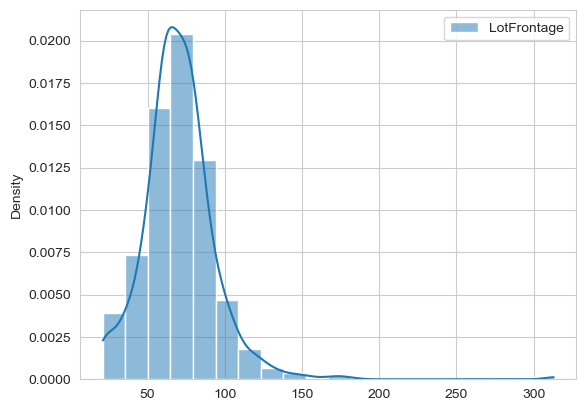

In [417]:
lot_frontage_df = train_set_cleaned[['LotFrontage']].dropna(axis = 0)
sns.histplot(lot_frontage_df, bins=20, kde=True, stat="density")

<Axes: ylabel='Density'>

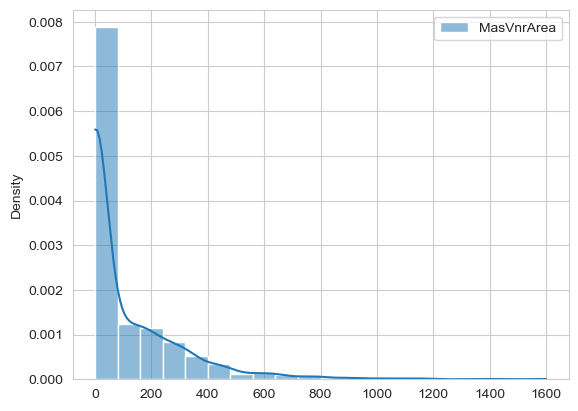

In [418]:
mas_vnr_area = train_set_cleaned[['MasVnrArea']].dropna(axis = 0)
sns.histplot(mas_vnr_area, bins=20, kde=True, stat="density")

In [419]:
# Due to the right-skewness of the distribution, we will employ median imputation to populate the missing data
# For the categorical data, we just use most frequent value

In [420]:
X_train_val, y_train_val = extractor(train_set_cleaned, 'SalePrice')

In [463]:
class ModelTraining:
  def __init__(self, X, y, method=None):
    self.method = method
    self.X = X
    self.y = y
      
    if method == 'rf':
        self.model = RandomForestRegressor(random_state=0)
        self.name = 'Random Forest'
    elif method == 'xgb':
        self.model = XGBRegressor(random_state=0)
        self.name = 'XGBoost'
    else:
        self.model = DecisionTreeRegressor(random_state=0)
        self.name = 'Decision Tree'
        self.parameters={
            "max_depth" : range(1,10),
            # "min_samples_leaf": range(1,5),
            # "min_samples_split": range(2,5),
        }

  def data_preprocessing(self, dataset):
    num, cat = get_cat_num_cols(dataset)
    numerical_transformer = Pipeline(steps=[
        ('num_imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler()),
    ])

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, num),
            ('cat', categorical_transformer, cat)
        ]
    )

    return preprocessor
        
  def train(self): 
      model_dic = {}
      processed_data = self.data_preprocessing(self.X)
      model_pipe = Pipeline(
          steps=[
              # ('preprocessor', processed_data),
              ('preprocessor', processed_data),
              ('model', self.model)
              ]
          )
      model_fit = model_pipe.fit(self.X, self.y) 
      model_dic['model'] = model_fit
      model_dic['name'] = self.name
      return model_dic
    
  def validate(self, val_X, val_y, model):
    predictions = {}
    prediction = model['model'].predict(val_X)
    mae = mean_absolute_error(val_y, prediction)

    predictions['name'] = model['name']
    predictions['score_type'] = "Mean Absolute Error"
    predictions['score'] = mae
    return predictions
  
  def predict(self, X, model):
    predictions = {}
    print(X.shape)
    prediction = model['model'].predict(X)
    predictions['X'] = X
    predictions['result'] = prediction
    return predictions

In [464]:
train_X, val_X, train_y, val_y = train_test_split(X_train_val, y_train_val, train_size=0.8, test_size=0.2, random_state=0)

In [465]:
# Instantiate model
model_instance_dt = ModelTraining(train_X, train_y)
model_instance_rf = ModelTraining(train_X, train_y, 'rf')
model_instance_xgb = ModelTraining(train_X, train_y, 'xgb')

In [466]:
train_model_1 = model_instance_dt.train()
train_model_2 = model_instance_rf.train()
train_model_3 = model_instance_xgb.train()

In [449]:
validate_models_1 = model_instance_dt.validate(val_X, val_y, train_model_1)
validate_models_2 = model_instance_rf.validate(val_X, val_y, train_model_2)
validate_models_3 = model_instance_xgb.validate(val_X, val_y, train_model_3)

In [467]:
print(validate_models_1)
print(validate_models_2)
print(validate_models_3)

{'name': 'Decision Tree', 'model': Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                               

In [468]:
validate_models_3['model']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullB...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=0, ...))])

In [477]:
predict = model_instance_xgb.predict(test_set_cleaned[:1], train_model_3)

(1, 59)


In [480]:
pd.DataFrame(predict['X'])

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF
0,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0


In [481]:
predict['result']

array([133109.34], dtype=float32)

In [489]:
# save the models as a pickle file
dt_model_pkl_file = "models/housing_price_model_dt.pkl"
rf_model_pkl_file = "models/housing_price_model_rf.pkl"
xgb_model_pkl_file = "models/housing_price_model_xgb.pkl"

In [490]:
pickle.dump(train_model_1, open(dt_model_pkl_file, 'wb'))
pickle.dump(train_model_2, open(rf_model_pkl_file, 'wb'))
pickle.dump(train_model_3, open(xgb_model_pkl_file, 'wb'))

In [492]:
loaded_dt_model = pickle.load(open(dt_model_pkl_file, 'rb'))
loaded_rf_model = pickle.load(open(rf_model_pkl_file, 'rb'))
loaded_xgb_model = pickle.load(open(xgb_model_pkl_file, 'rb'))

In [493]:
loaded_xgb_model['model'].predict(test_set_cleaned[:1])

array([133109.34], dtype=float32)